# Zomato Bangalore Dataset : classification

In [325]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier,StackingClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_auc_score,roc_curve,f1_score,recall_score,precision_score,classification_report

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Business Problem

**The Aim is to classify the orders that have been ordered online and offline. And 
identify the patterns that lead to orders online orders as well as offline.**

In [199]:
data=pd.read_csv("zomato.csv")

In [200]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [201]:
data.shape

(51717, 17)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [203]:
missing=data.isnull().sum()*100/data.shape[0]
missing

url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [204]:
data['online_order'].describe()

count     51717
unique        2
top         Yes
freq      30444
Name: online_order, dtype: object

# Part 1: Preprocessing

### 1.1 Droping following columns. Not useful for analysis of approx cost

In [205]:
data.drop(["url","address","phone","location"],axis=1,inplace=True) # Droping columns not significant to analysis

### 1.2 Dropping duplicate values

In [206]:
sum(data.duplicated())

64

In [207]:
data.drop_duplicates(inplace=True)

In [208]:
data.shape

(51653, 13)

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51653 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51653 non-null  object
 1   online_order                 51653 non-null  object
 2   book_table                   51653 non-null  object
 3   rate                         43894 non-null  object
 4   votes                        51653 non-null  int64 
 5   rest_type                    51426 non-null  object
 6   dish_liked                   23627 non-null  object
 7   cuisines                     51608 non-null  object
 8   approx_cost(for two people)  51308 non-null  object
 9   reviews_list                 51653 non-null  object
 10  menu_item                    51653 non-null  object
 11  listed_in(type)              51653 non-null  object
 12  listed_in(city)              51653 non-null  object
dtypes: int64(1), object(12)
memory 

### 1.3 Handling Null values
#### (i) Dealing with Rating column

**Rate column shows three variation for irregular data with values: NEW,"nan","-"**

In [210]:
data["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [211]:
# Replace with np.nan
data.replace(['NEW',"-","nan"],[np.nan,np.nan,np.nan],inplace=True)
data.rate.unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [212]:
data["rate"]=data["rate"].apply(lambda x:str(x).split("/")[0]).astype(float)
data.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [213]:
data_rate=data.groupby('name')['rate'].mean().to_frame()
data_rate=data_rate.reset_index()
data_rate.columns=['restaurant','rating']
data_rate.sort_values(by="rating",ascending=False).head(20)

,restaurant,rating
597,Asia Kitchen By Mainland China,4.900000
1274,Byg Brewski Brewing Company,4.900000
6552,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
5927,Punjab Grill,4.871429
865,Belgian Waffle Factory,4.844828
2598,Flechazo,4.800000
5471,O.G. Variar & Sons,4.800000
8035,The Pizza Bakery,4.800000
129,AB's - Absolute Barbecues,4.789474
964,Biergarten,4.766667


In [214]:
missing=data.isnull().sum()*100/data.shape[0]
missing

name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           19.410296
votes                           0.000000
rest_type                       0.439471
dish_liked                     54.258223
cuisines                        0.087120
approx_cost(for two people)     0.667919
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

### (iii) Dealing with review list column

In [215]:
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))
type(data.reviews_list[0])

list

In [216]:
data.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

In [217]:
extracted = [float(i[0].replace('Rated','').strip()) for i in data.reviews_list[0]]
extracted

[4.0, 4.0, 2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 4.0, 4.0]

In [218]:
extracted_mean = round((sum(extracted)/len(extracted)),1)
extracted_mean

4.1

In [219]:
print("Extracted Rate: ",extracted_mean)
print("Original Rate: ",data.rate[0])

Extracted Rate:  4.1
Original Rate:  4.1


In [220]:
def extract_features_from_review_list(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not x or len(x) <= 1:
        return None
    
    # checked give values is text or not, if it is text then removed 'Rated', convert string to float.
    rate = [float(i[0].replace('Rated','').strip())  for i in x if type(i[0])== str]
    
    # return average value
    return round((sum(rate)/len(rate)),1)

In [221]:
# create new column
data['review_rate']  = data.reviews_list.apply(lambda x : extract_features_from_review_list(x))

In [222]:
## Compare "Original Rate" vs "Rate extracted from Review List"
data.loc[:,['rate','review_rate']].sample(10,random_state=1)

,rate,review_rate
40002,4.1,3.3
1407,3.8,NaN
49897,2.9,3.0
121,3.3,NaN
43418,3.1,3.1
37478,NaN,NaN
9001,NaN,NaN
29899,3.8,4.5
40824,NaN,NaN
17410,3.9,4.2


In [223]:
# get the before number of null values
data.rate.isna().sum()

10026

In [224]:
## finding rate = NaN and review_rate == not NaN
temp=data[["rate","review_rate"]].query('rate != rate & review_rate == review_rate')

In [225]:
## finding index where rate==NaN and review_rate== not NaN
nan_index = data.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    data.loc[i,'rate'] = data.loc[i,'review_rate'] 

In [226]:
# update the number of null values now
data.rate.isna().sum()

8521

In [227]:
((data.isna().sum()/len(data))*100).round(2)

name                            0.00
online_order                    0.00
book_table                      0.00
rate                           16.50
votes                           0.00
rest_type                       0.44
dish_liked                     54.26
cuisines                        0.09
approx_cost(for two people)     0.67
reviews_list                    0.00
menu_item                       0.00
listed_in(type)                 0.00
listed_in(city)                 0.00
review_rate                    31.15
dtype: float64

In [228]:
# # first let's drop the review_rate column now
data.drop(columns='review_rate',axis=1,inplace=True)

### (iii) Dealing with approx_cost(for two people)

In [229]:
data["approx_cost(for two people)"].replace({"nan":np.nan},inplace=True)

In [230]:
data["approx_cost(for two people)"]=data["approx_cost(for two people)"].apply(lambda x:str(x).replace(',',"")).astype("float")

In [231]:
data_approx_cost=data.groupby('name')['approx_cost(for two people)'].mean().to_frame()
data_approx_cost=data_approx_cost.reset_index()
data_approx_cost.columns=['restaurant','approx_cost']
data_approx_cost.sort_values(by="approx_cost",ascending=False).head(20)

,restaurant,approx_cost
4372,Le Cirque Signature - The Leela Palace,6000.0
6263,Royal Afghan - ITC Windsor,5000.0
4628,Malties - Radisson Blu,4500.0
4276,La Brasserie - Le Meridien,4100.0
2965,Grill 99 - The Ritz-Carlton,4000.0
6207,Riwaz - The Ritz-Carlton,4000.0
4709,Masala Klub - The Taj West End,4000.0
2358,Dum Pukht Jolly Nabobs - ITC Windsor,4000.0
306,Alba - JW Marriott Bengaluru,4000.0
3693,Jamavar - The Leela Palace,4000.0


In [232]:
# drop null values
data.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [233]:
# check shape
data.shape

(42854, 13)

In [234]:
data.isna().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
rest_type                        147
dish_liked                     19394
cuisines                           8
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [235]:
# remove cuisines missing values
data=data[data.cuisines.isna()==False]

In [236]:
data.rename(columns={'approx_cost(for two people)': 'average_cost'}, inplace=True)

In [237]:
# check for percentage of null values 
((data.isna().sum()/data.shape[0])*100).round(2)

name                0.00
online_order        0.00
book_table          0.00
rate                0.00
votes               0.00
rest_type           0.34
dish_liked         45.25
cuisines            0.00
average_cost        0.00
reviews_list        0.00
menu_item           0.00
listed_in(type)     0.00
listed_in(city)     0.00
dtype: float64

In [238]:
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)
data.dish_liked[:2]

0    pasta, lunch buffet, masala papad, paneer laja...
1    momos, lunch buffet, chocolate nirvana, thai g...
Name: dish_liked, dtype: object

In [239]:
menu_list = []

# collect the dishes' names and make a menu list for all kind of dishes
for dish in data.dish_liked.tolist():
    if isinstance(dish,str) and len(dish)>0:
        for e in dish.split(','):
            menu_list.append(e)
len(menu_list)

127815

In [240]:
# Now collect the unique dish name 
menu_set = set(menu_list)

### (iv) Dish_liked, handling using menu_list column

In [241]:
def clear_text(t):
    return ' '.join([i[1] for i in t]).encode('utf8').decode('ascii',errors='replace')
    

In [242]:
data['process_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [243]:
data['process_text'] = data.process_text.apply(lambda x : x.replace("RATED\n  ",'').replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower())


In [244]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [245]:
menu_set.intersection(data.process_text[10000].split(' '))

{'chicken', 'fish', 'rice', 'thali'}

In [246]:
#creat a new column for the reviewed dish
data['dish_n_review'] = data.process_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

,dish_liked,dish_n_review
51106,NaN,"manchurian, biryani, chicken, fish, halwa"
14224,NaN,pizza
28985,NaN,
39225,NaN,"biryani, vegetarian, naan"
7103,NaN,


In [247]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = data.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    data.loc[i,'dish_liked'] = data.loc[i,'dish_n_review']

In [248]:
del menu_list
del menu_set

In [249]:
# first let's drop the review_rate column now
data.drop(columns=['dish_n_review'],axis=1,inplace=True)

In [250]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name               0.000
online_order       0.000
book_table         0.000
rate               0.000
votes              0.000
rest_type          0.343
dish_liked         0.000
cuisines           0.000
average_cost       0.000
reviews_list       0.000
menu_item          0.000
listed_in(type)    0.000
listed_in(city)    0.000
process_text       0.000
dtype: float64

In [251]:
# drop null values
data.dropna(subset=['rest_type'],inplace=True)

In [252]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name               0.0
online_order       0.0
book_table         0.0
rate               0.0
votes              0.0
rest_type          0.0
dish_liked         0.0
cuisines           0.0
average_cost       0.0
reviews_list       0.0
menu_item          0.0
listed_in(type)    0.0
listed_in(city)    0.0
process_text       0.0
dtype: float64

# Part 2: EDA

### 2.1 Univariate analysis

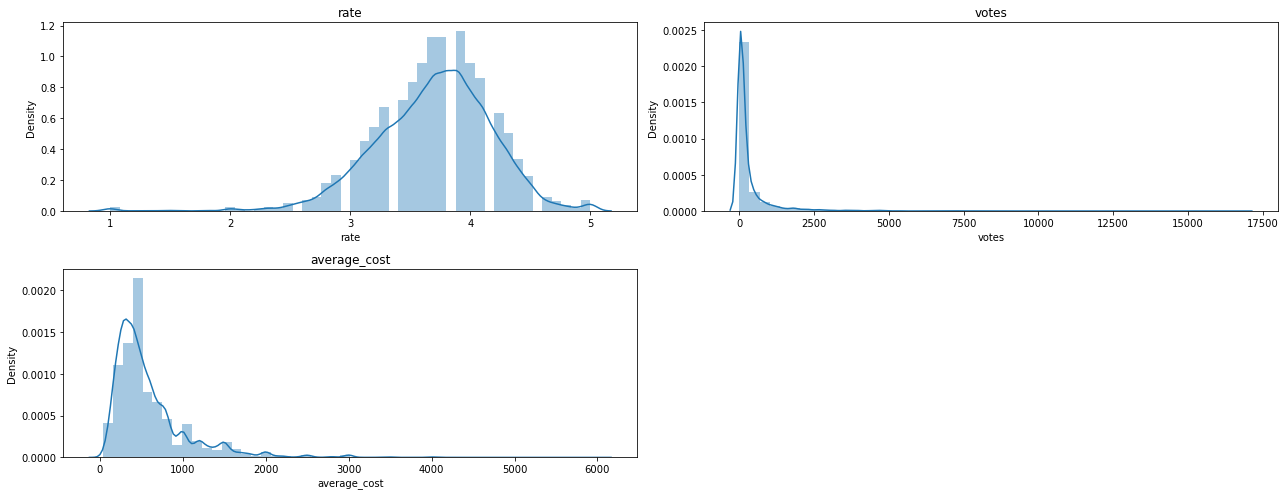

In [253]:
num_vars=data.select_dtypes(include=np.number).columns

nrows=2
ncols=2
repeater=1

plt.figure(figsize=(18,7))

for i in num_vars:
    plt.subplot(nrows,ncols,repeater)
    repeater+=1
    plt.title(i)
    sns.distplot(data[i])
                 
plt.tight_layout()
plt.show()

In [254]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rate,42699.0,3.698433,0.486366,1.0,3.4,3.7,4.0,5.0
votes,42699.0,341.142064,871.724350,0.0,18.0,68.0,261.0,16832.0
average_cost,42699.0,597.838497,460.976344,40.0,300.0,450.0,700.0,6000.0


In [58]:
data.select_dtypes(include="object").columns

Index(['name', 'online_order', 'book_table', 'rest_type', 'dish_liked',
       'cuisines', 'reviews_list', 'menu_item', 'listed_in(type)',
       'listed_in(city)', 'process_text'],
      dtype='object')

In [59]:
data.describe(include="object").T

,count,unique,top,freq
name,42699,6838,Cafe Coffee Day,86
online_order,42699,2,Yes,27920
book_table,42699,2,No,36305
rest_type,42699,88,Quick Bites,14529
dish_liked,42699,7446,,4443
cuisines,42699,2416,North Indian,2203
reviews_list,42699,21649,[],1110
menu_item,42699,8492,[],31430
listed_in(type),42699,7,Delivery,21235
listed_in(city),42699,30,BTM,2690


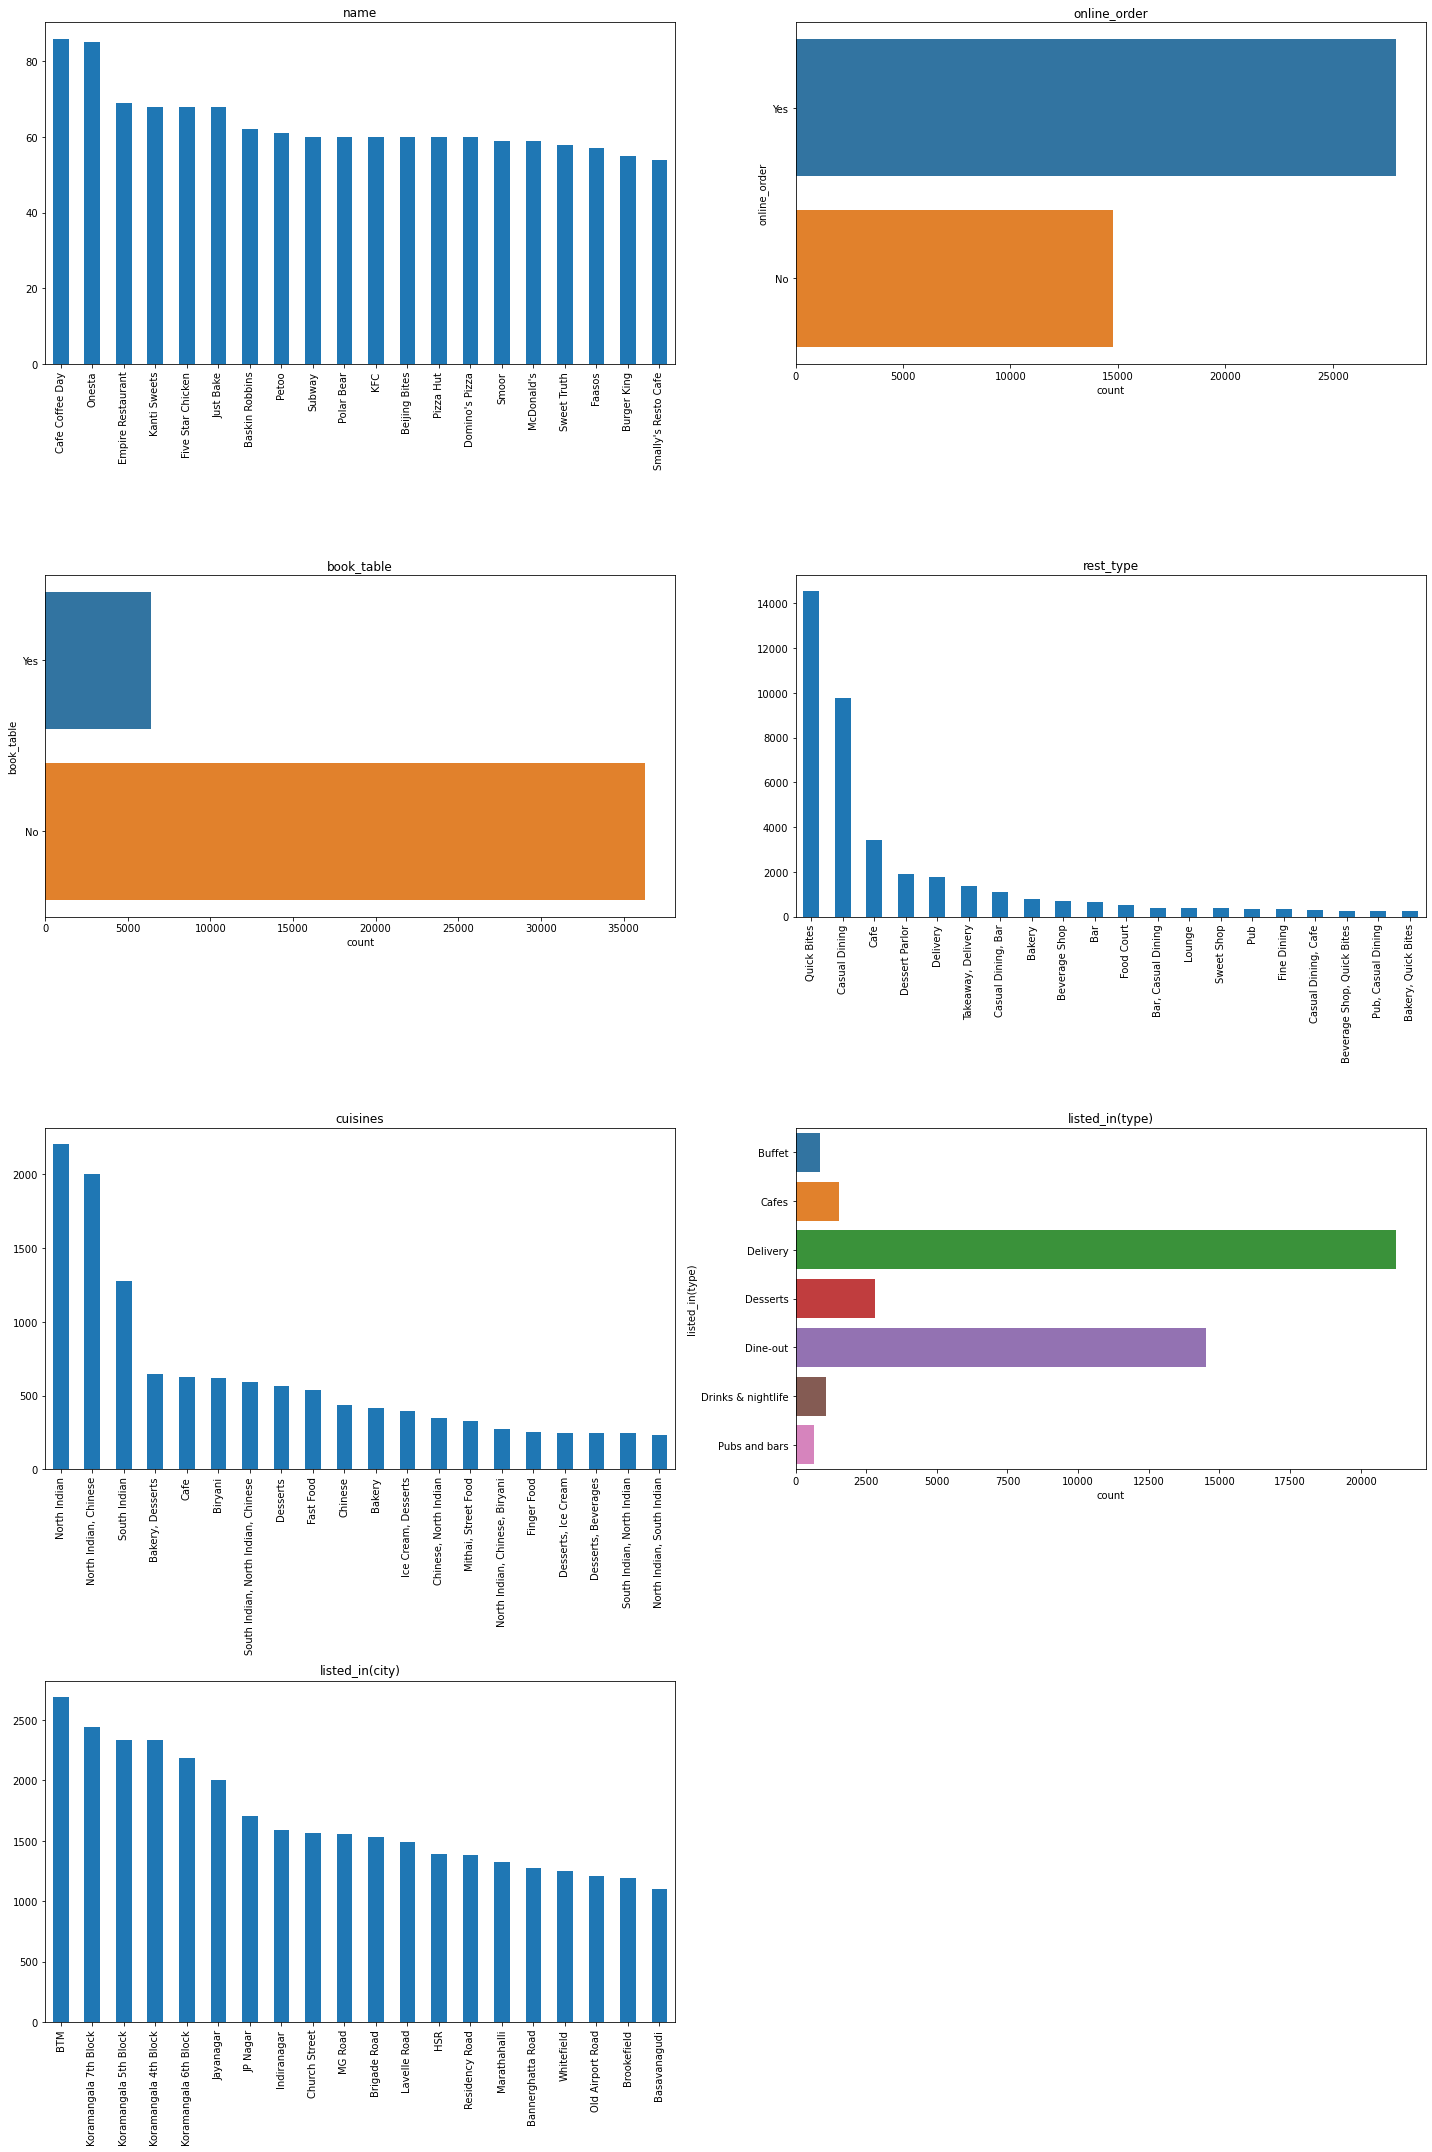

In [60]:
cat_var=['name', 'online_order', 'book_table', 'rest_type', 'cuisines',
       'listed_in(type)', 'listed_in(city)']

nrows=4
ncols=2
repeater=1

plt.figure(figsize=(20,30))

for i in cat_var:
    plt.subplot(nrows,ncols,repeater)
    repeater+=1
    plt.title(i)
    if data[i].nunique() in range(0,10):
        sns.countplot(y=i,data=data)
    else:
        data[i].value_counts().head(20).plot(kind="bar")
        #plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

* The restuarant with the highest number of outlets in Bangalore is CafeCoffeeDay
* There are more number of restaurants that take online orders as compared to those that take only offline orders
* There are less number of restuarants that allow to book table, and more that don't allow.
* The restuarant type with the highest number of outlets in Bangalore is "Quick Bites"
* The restuarant cusine with the highest number of outlets in Bangalore is "North Indian"
* The location with the highest number of outlets in Bangalore is "BTM"

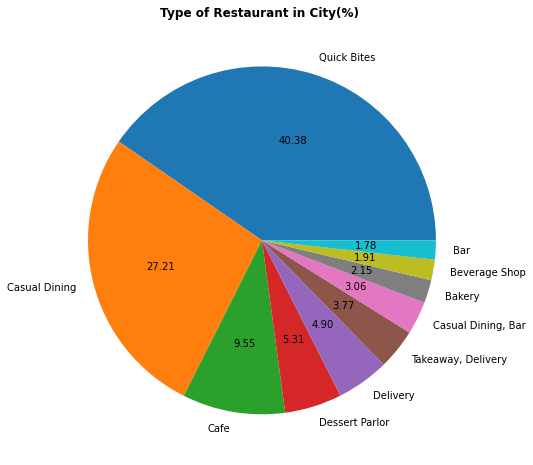

In [61]:
plt.figure(figsize=(8,8))
values = data.rest_type.value_counts()[:10]
labels = data['rest_type'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurant in City(%) ', weight='bold')
plt.show()

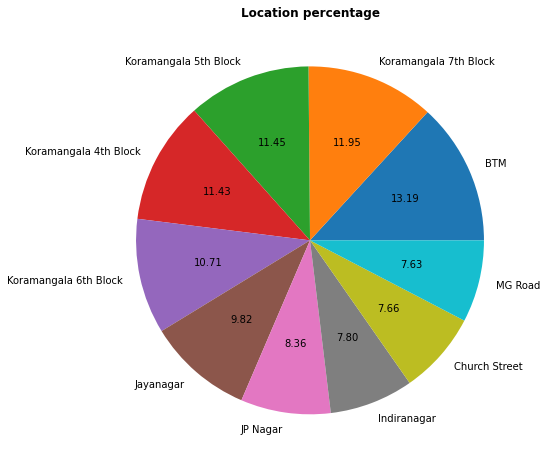

In [62]:
plt.figure(figsize=(8,8))
values = data['listed_in(city)'].value_counts()[:10]
labels = data['listed_in(city)'].value_counts()[:10].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Location percentage', weight='bold')
plt.show()

In [63]:
# count each dish to see how many times each dish repeated
dish_count = []
for i in data.dish_liked: ## iterate in each rows in table
    for t in i.split(','):
        t = t.strip() # remove the white spaces to get accurate results
        dish_count.append(t)

In [64]:
dish_count[:10]

['pasta',
 'lunch buffet',
 'masala papad',
 'paneer lajawab',
 'tomato shorba',
 'dum biryani',
 'sweet corn soup',
 'momos',
 'lunch buffet',
 'chocolate nirvana']

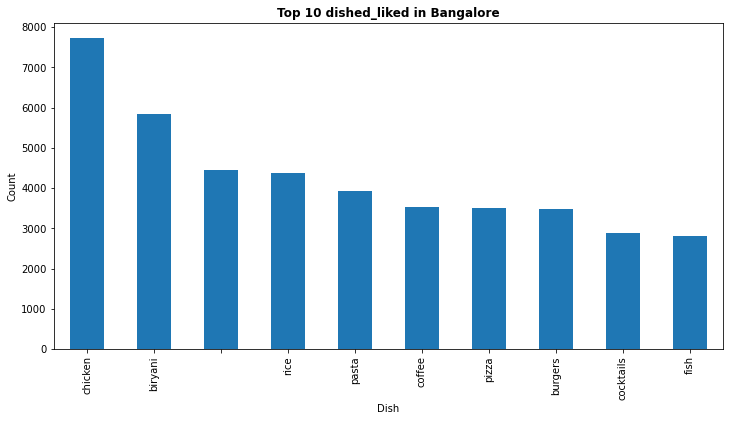

In [65]:
plt.figure(figsize=(12,6)) 
pd.Series(dish_count).value_counts()[:10].plot(kind='bar')
plt.title('Top 10 dished_liked in Bangalore',weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')
plt.show()

### 2.2 Bivariate analysis

**'Rate' vs 'Restaurant type' graph.**

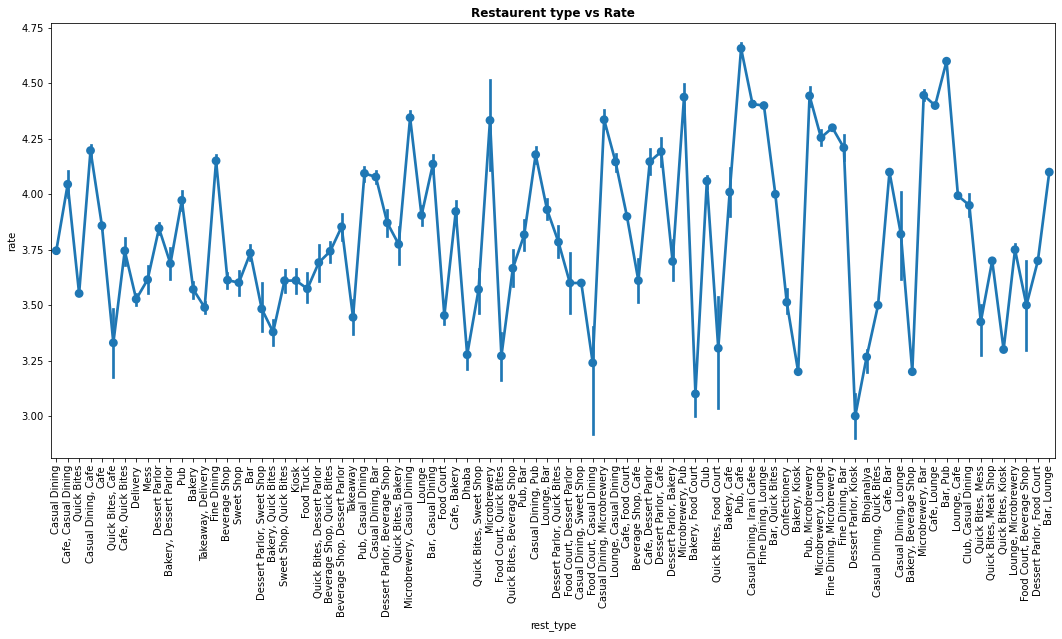

In [66]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["rate"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Rate', weight = 'bold')
plt.show()

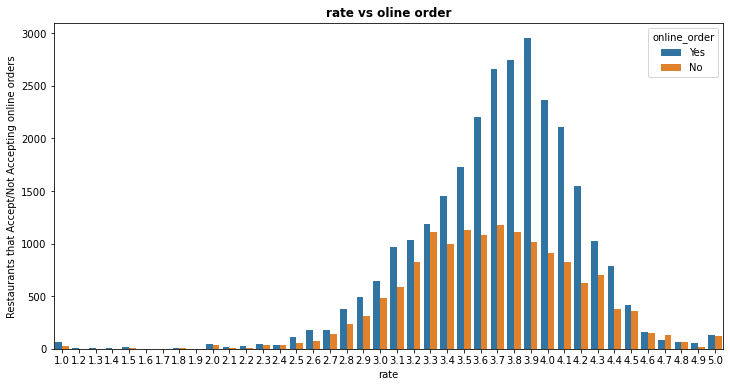

In [67]:
plt.figure(figsize = (12,6))
sns.countplot(x=data['rate'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("rate vs oline order",weight = 'bold')
plt.show()

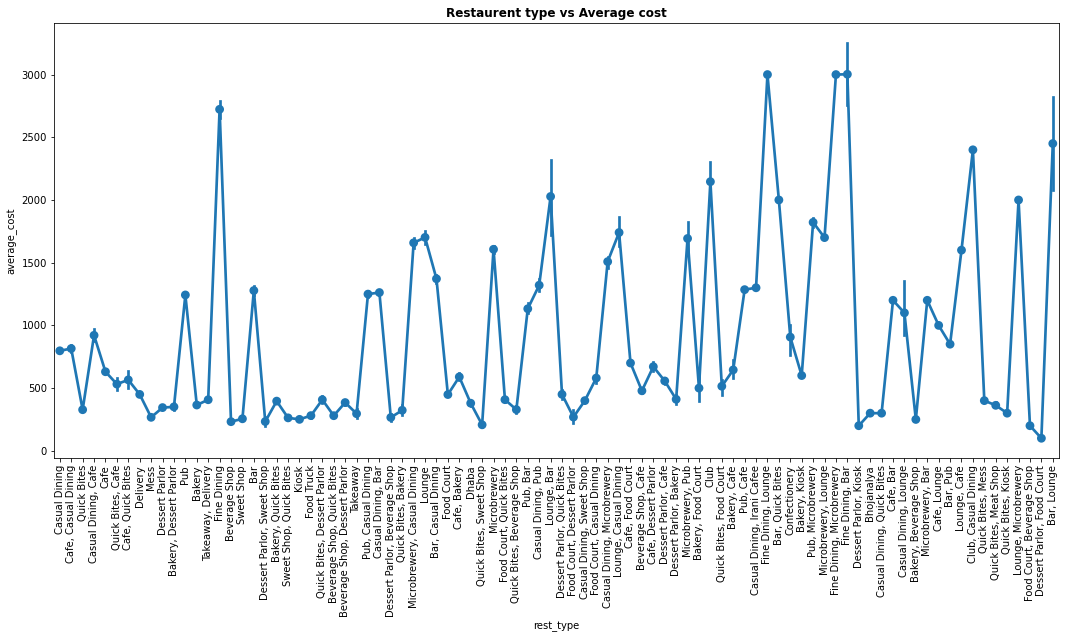

In [68]:
f,ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["rest_type"], y=data["average_cost"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title('Restaurent type vs Average cost', weight = 'bold')
plt.show()

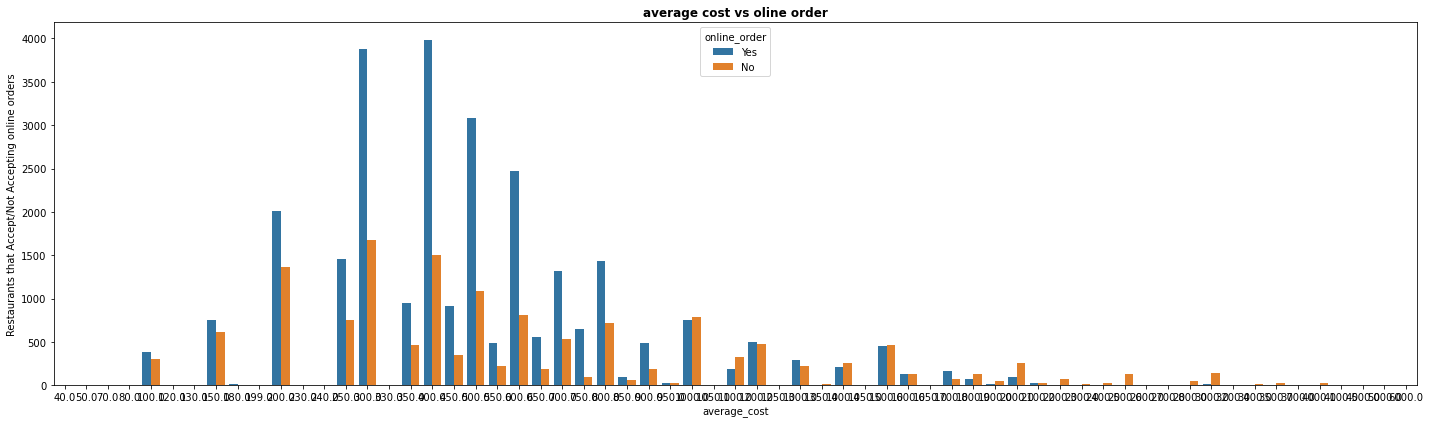

In [69]:
plt.figure(figsize = (20,6))
sns.countplot(x=data['average_cost'], hue = data['online_order'])
plt.ylabel("Restaurants that Accept/Not Accepting online orders")
plt.title("average cost vs oline order",weight = 'bold')
plt.tight_layout()
plt.show()

### 2.3 Outlier Detection

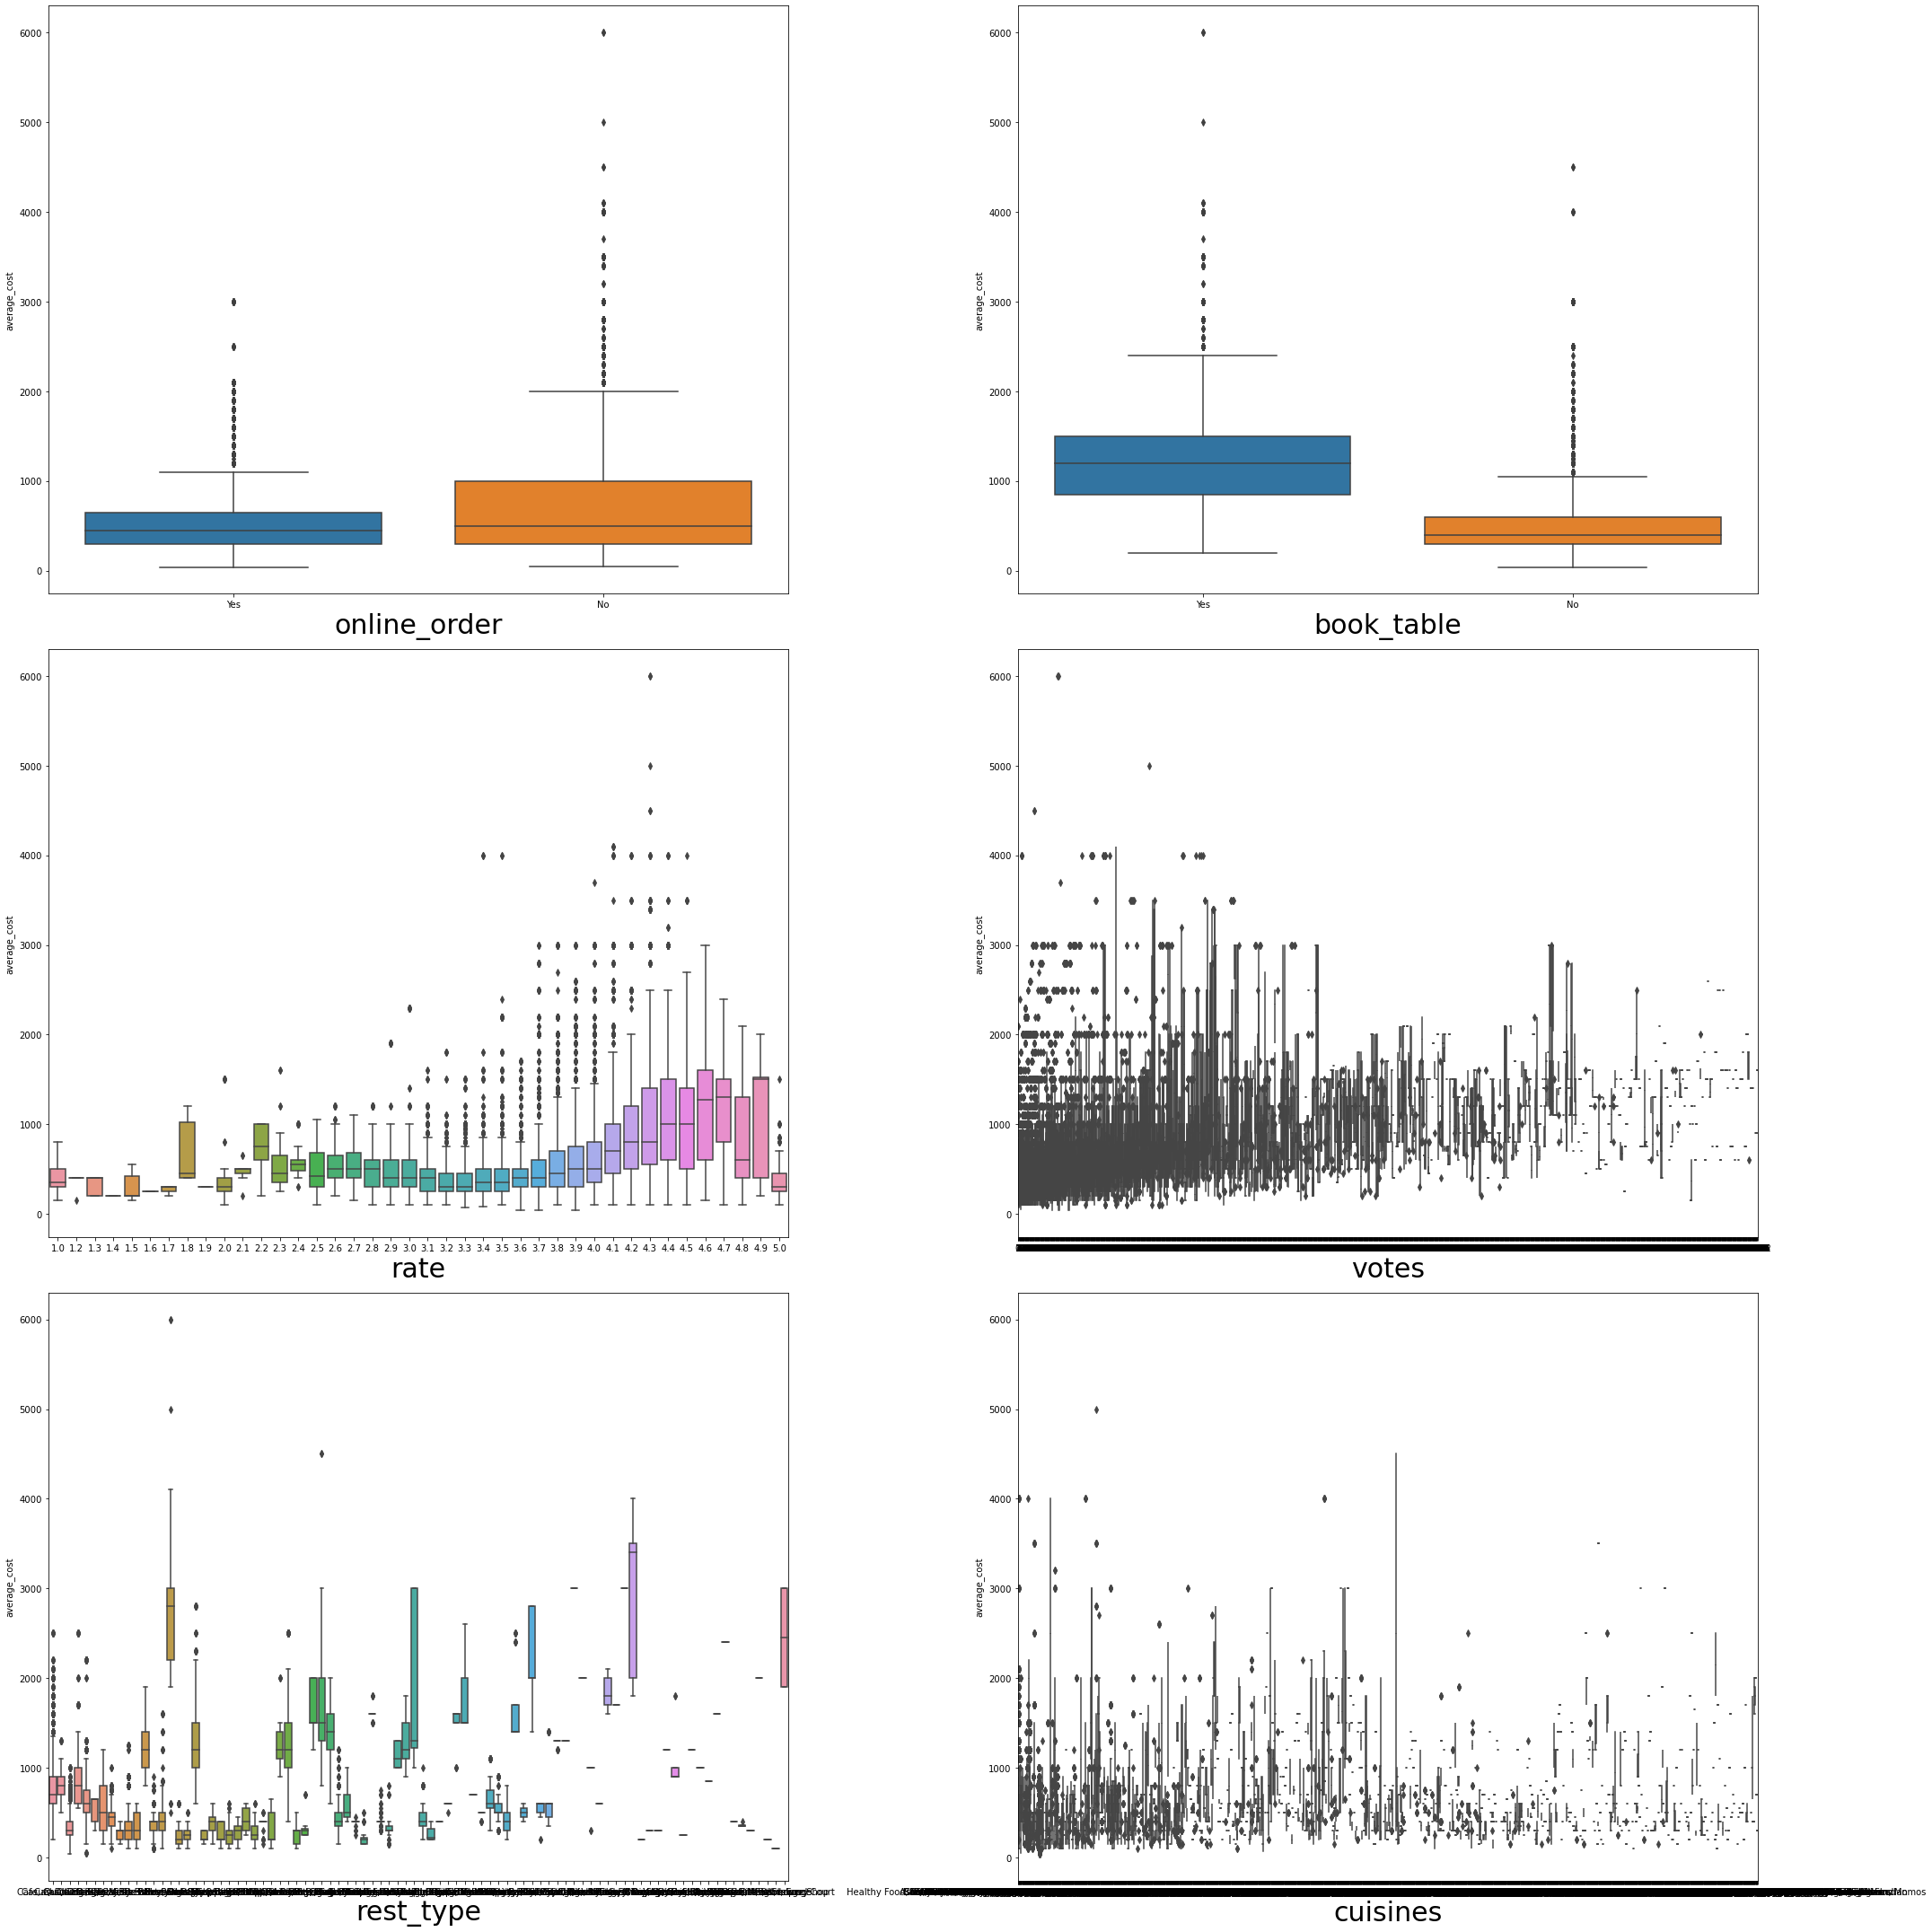

In [255]:
fig, ax = plt.subplots(3, 2, figsize=(30, 30))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(['online_order','book_table','rate','votes','rest_type','cuisines'], ax.flatten()):
    
    boxplt = sns.boxplot(x=variable, y='average_cost', data=data, ax=subplot)
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

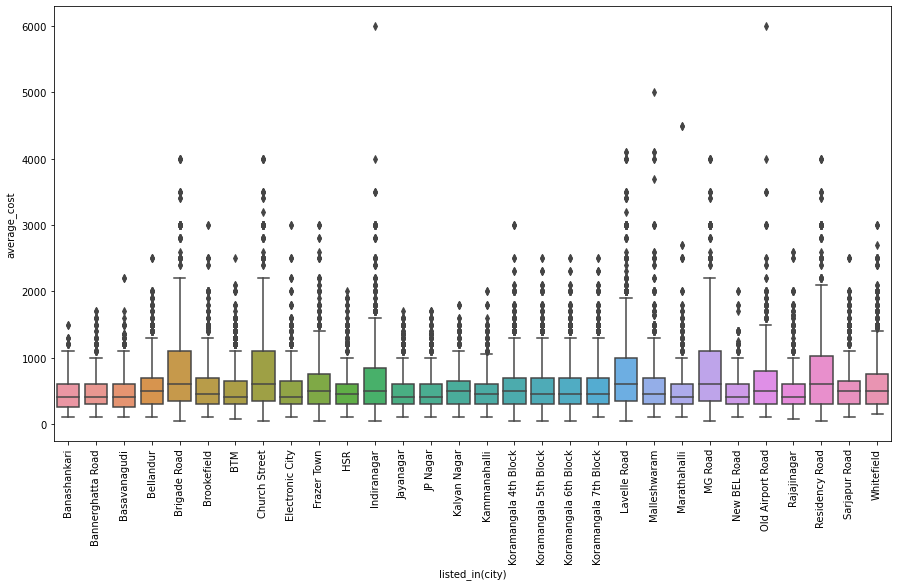

In [256]:
# set the figure size
plt.figure(figsize=(15, 8))

ax = sns.boxplot(x=data['listed_in(city)'], y=data['average_cost'], data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize = 10)

# display the plot
plt.show()

### 2.3 Feature Engineering

In [257]:
data['region']=data['listed_in(city)']
data.region.unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [258]:
data['region'].replace(['Banashankari','Basavanagudi','Bannerghatta Road',
                        'Jayanagar','JP Nagar','Residency Road'],
                        'Southern',inplace=True)

data['region'].replace(['Bellandur','Marathahalli','Whitefield','Brookefield','MG Road',
                        'Old Airport Road'],
                        'Eastern',inplace=True)

data['region'].replace(['BTM','Electronic City','HSR','Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block','Sarjapur Road'],
                                    'South-Eastern',inplace=True)

data['region'].replace(['Indiranagar','Brigade Road','Lavelle Road',
                       'Church Street'],
                        'Central',inplace=True)

data['region'].replace(['Kalyan Nagar','Kammanahalli','Frazer Town'],
                        'North-Eastern',inplace=True)

data['region'].replace(['Rajajinagar'],'Western',inplace=True)

data['region'].replace(['Malleshwaram'],'North-Western',inplace=True)

data['region'].replace(['New BEL Road'],'Northern',inplace=True)

data['region'].value_counts()

South-Eastern    15291
Southern          8208
Eastern           7529
Central           6167
North-Eastern     3081
North-Western      956
Western            887
Northern           580
Name: region, dtype: int64

In [259]:
data.drop(['listed_in(city)'], axis=1,inplace=True)

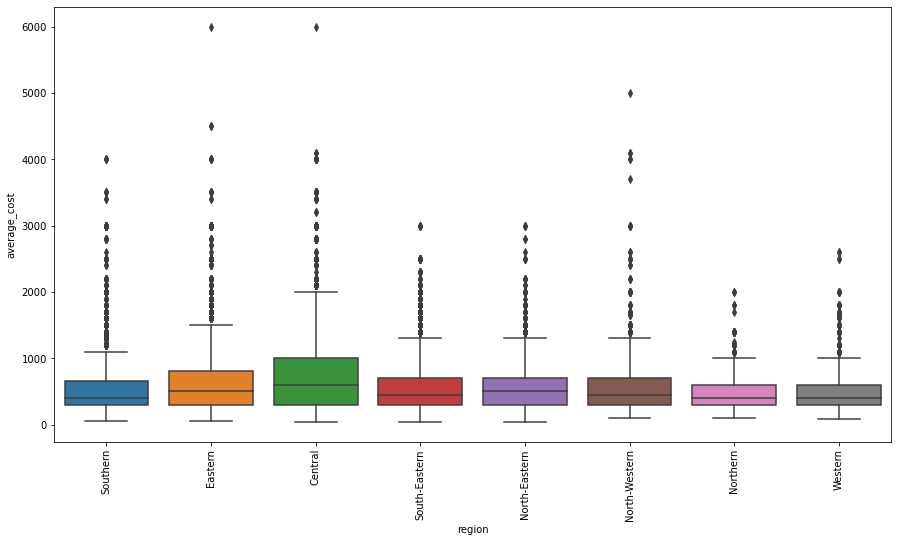

In [260]:
# set figure size
plt.figure(figsize=(15,8))
ax = sns.boxplot(x="region", y="average_cost", data=data)
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)

# show the plot
plt.show()

In [326]:
mm=MinMaxScaler()
data[["average_cost","rate","votes"]]=mm.fit_transform(data[["average_cost",'rate','votes']])

In [327]:
data.head(2)

,name,online_order,book_table,rate,votes,rest_type,cuisines,average_cost,region
0,Jalsa,1,1,0.775,0.046043,Casual Dining,Chinese Indian Mughlai North,0.127517,Southern
1,Spice Elephant,1,0,0.775,0.046756,Casual Dining,Chinese Indian North Thai,0.127517,Southern


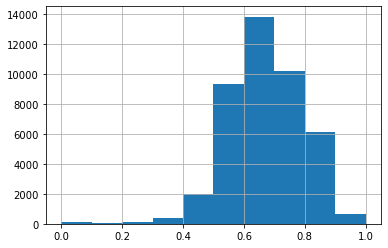

In [328]:
data.rate.hist()
# display the plot
plt.show()

In [329]:
from scipy.stats import jarque_bera
# normality test using jarque_bera()
# the test returns the the test statistics and the p-value of the test
stat, p = jarque_bera(data["average_cost"])

print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=194558.363, p-value=0.000
The data is not normally distributed (reject H0)


If the data is not normally distributed, use log transformation to get near normally distributed data

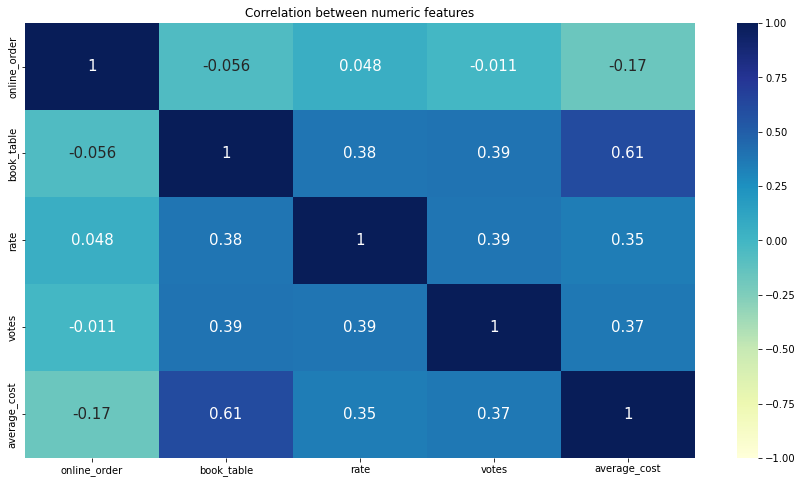

In [330]:
# set the figure size
plt.figure(figsize=(15, 8))

sns.heatmap(data.corr(), cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

In [331]:
data.groupby(["online_order"]).count()

,name,book_table,rate,votes,rest_type,cuisines,average_cost,region
online_order,,,,,,,,
0,14779,14779,14779,14779,14779,14779,14779,14779
1,27920,27920,27920,27920,27920,27920,27920,27920


### 2.4 Prepare the data

In [332]:
# removed ',' between two words; then converted to categorical features
data['rest_type'] = data['rest_type'].str.replace(',' , '') 
data['rest_type'] = data['rest_type'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['rest_type'].value_counts().head()

Bites Quick       14529
Casual Dining      9788
Cafe               3435
Dessert Parlor     1910
Delivery           1762
Name: rest_type, dtype: int64

In [333]:
# drop redudant columns
data.drop(columns=['dish_liked','reviews_list','menu_item','listed_in(type)','process_text'], inplace=True)

KeyError: "['dish_liked' 'reviews_list' 'menu_item' 'listed_in(type)' 'process_text'] not found in axis"

In [334]:
data['online_order']= pd.get_dummies(data.online_order, drop_first=True) 
data['book_table']= pd.get_dummies(data.book_table, drop_first=True) 
data.head(2)

,name,online_order,book_table,rate,votes,rest_type,cuisines,average_cost,region
0,Jalsa,1,1,0.775,0.046043,Casual Dining,Chinese Indian Mughlai North,0.127517,Southern
1,Spice Elephant,1,0,0.775,0.046756,Casual Dining,Chinese Indian North Thai,0.127517,Southern


In [337]:
# removed ',' between two words; then converted to categorical features

data['cuisines'] = data['cuisines'].str.replace(',' , '') 
data['cuisines'] = data['cuisines'].astype(str).apply(lambda x: ' '.join(sorted(x.split())))
data['cuisines'].value_counts().head()

Chinese Indian North                 2348
Indian North                         2203
Indian South                         1274
Chinese Indian Indian North South    1117
Bakery Desserts                       818
Name: cuisines, dtype: int64

In [335]:
df_numeric_features = data.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'average_cost'], dtype='object')

In [336]:
df_categoric_features = data.select_dtypes(include=[np.object])

# display categorical features
df_categoric_features.columns

Index(['name', 'rest_type', 'cuisines', 'region'], dtype='object')

In [338]:
df_categoric_features.drop(['name'],axis = 1,inplace=True)

In [339]:
df_categoric_features.columns

Index(['rest_type', 'cuisines', 'region'], dtype='object')

In [340]:
for col in df_categoric_features.columns.values:
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    df_categoric_features.drop([col], axis=1, inplace=True)

In [341]:
df_online_order_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
df_online_order_dummy.head()

,online_order,book_table,rate,votes,average_cost,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Court Food,rest_type_Bakery Dessert Parlor,...,cuisines_Tibetan,cuisines_Turkish,cuisines_Vietnamese,region_Eastern,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western
0,1,1,0.775,0.046043,0.127517,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0.775,0.046756,0.127517,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0.700,0.054539,0.127517,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0.675,0.005228,0.043624,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0.700,0.009862,0.093960,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Part 3: ML

In [342]:
X = df_online_order_dummy.drop(['average_cost','online_order'], axis=1)

# extract the target variable from the data set
y = df_online_order_dummy['online_order']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

print("The shape of X_train is:",X_train.shape)
print("The shape of X_test is:",X_test.shape)
print("The shape of y_train is:",y_train.shape)
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (32024, 1801)
The shape of X_test is: (10675, 1801)
The shape of y_train is: (32024,)
The shape of y_test is: (10675,)


In [346]:
perf_score=pd.DataFrame(columns=["Model","Accuracy","Recall","Precision","F1-score"])
perf_score

,Model,Accuracy,Recall,Precision,F1-score


In [347]:
def per_measures(model,test,pred):
    accuracy=accuracy_score(test,pred)
    f1score=f1_score(test,pred)
    recall=recall_score(test,pred)
    precision=precision_score(test,pred)
    
    return (accuracy,recall,precision,f1score)

In [348]:
def update_performance(name,model,test,pred):
    global perf_score
    
    perf_score=perf_score.append({"Model":name,
                                 "Accuracy":per_measures(model,test,pred)[0],
                                 "Recall":per_measures(model,test,pred)[1],
                                 "Precision":per_measures(model,test,pred)[2],
                                 "F1-score":per_measures(model,test,pred)[3]},
                                ignore_index=True)

### 3.1 Logistic regression

In [349]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [350]:
coef_logit=log_reg.coef_
coef_logit

array([[0.30518555, 1.84418674, 1.59970949, ..., 0.44565892, 0.3752012 ,
        0.02003136]])

In [351]:
coef_odd=np.exp(coef_logit)
coef_odd

array([[1.35687675, 6.32295549, 4.95159373, ..., 1.56151878, 1.45528418,
        1.02023333]])

In [352]:
res=pd.DataFrame({"Feature":X_train.columns,
                 "Logit":coef_logit[0],
                 'odd_ratio':coef_odd[0]})
res.sort_values(by="odd_ratio",ascending=False)

,Feature,Logit,odd_ratio
161,cuisines_American Chinese Finger Food Indian N...,2.783990,16.183466
160,cuisines_American Chinese Finger Food Indian M...,2.514688,12.362749
1416,cuisines_Continental European Fast Food,2.266369,9.644315
1273,cuisines_Chinese Finger Food Indian Mangalorea...,2.197701,9.004285
630,cuisines_Bengali Seafood,2.195927,8.988326
...,...,...,...
1582,cuisines_Fast Food Mexican,-3.306576,0.036641
527,cuisines_BBQ European Indian Mediterranean North,-3.562292,0.028374
56,rest_type_Dining Fine,-3.708359,0.024518
526,cuisines_BBQ European Indian Kebab Mediterrane...,-3.716755,0.024313


In [353]:
ypred_lr=log_reg.predict(X_test)
print(classification_report(y_test,ypred_lr))

              precision    recall  f1-score   support

           0       0.77      0.44      0.56      3773
           1       0.75      0.93      0.83      6902

    accuracy                           0.76     10675
   macro avg       0.76      0.68      0.69     10675
weighted avg       0.76      0.76      0.73     10675



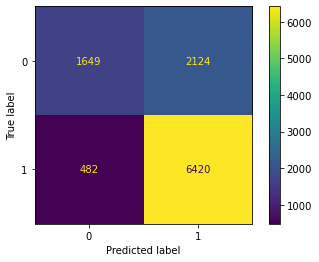

In [354]:
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_lr)).plot()
plt.show()

In [355]:
update_performance(name="LogisticReg-base",model=log_reg,test=y_test,pred=ypred_lr)

In [356]:
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283


### 3.2 KNN

In [357]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
ypred_knn=knn.predict(X_test)

In [358]:
update_performance(name="KNN-base",model=knn,test=y_test,pred=ypred_knn)

In [359]:
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986


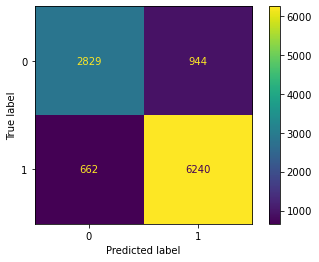

In [360]:
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_knn)).plot()
plt.show()

### 3.3 Decision Tree

In [361]:
dt=DecisionTreeClassifier(random_state=10)
dt.fit(X_train,y_train)
ypred_dt=dt.predict(X_test)

In [362]:
update_performance(name="DT-base",model=dt,test=y_test,pred=ypred_dt)

In [363]:
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986
2,DT-base,0.934052,0.949870,0.948221,0.949045


In [364]:
dt.feature_importances_

array([0.00882526, 0.11150822, 0.20489395, ..., 0.01434607, 0.01439071,
       0.00524681])

In [365]:
dt_features=pd.DataFrame({"Feature":X_train.columns,
                 'Importance':dt.feature_importances_})
dt_features.sort_values(by="Importance",ascending=False)[:10]

,Feature,Importance
2,votes,0.204894
1,rate,0.111508
9,rest_type_Bar,0.017860
56,rest_type_Dining Fine,0.016535
1799,region_Southern,0.014391
1798,region_South-Eastern,0.014346
1794,region_Eastern,0.014303
61,rest_type_Lounge,0.013501
30,rest_type_Bites Quick,0.011842
1348,cuisines_Chinese Indian North,0.010779


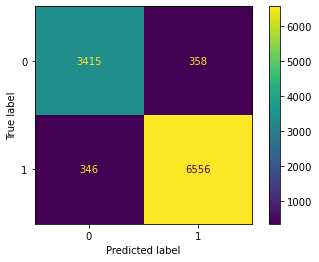

In [366]:
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_dt)).plot()
plt.show()

### 3.4 Decision Tree Entropy

In [367]:
dt_en=DecisionTreeClassifier(criterion="entropy",random_state=10)
dt_en.fit(X_train,y_train)
ypred_dt_en=dt_en.predict(X_test)

In [368]:
update_performance(name="DT_en-base",model=dt_en,test=y_test,pred=ypred_dt_en)

In [369]:
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986
2,DT-base,0.934052,0.949870,0.948221,0.949045
3,DT_en-base,0.930585,0.948421,0.944452,0.946432


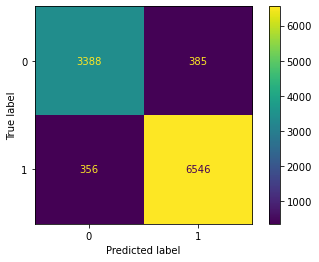

In [370]:
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_dt_en)).plot()
plt.show()

In [371]:
dt_en_features=pd.DataFrame({"Feature":X_train.columns,
                 'Importance':dt_en.feature_importances_})
dt_en_features.sort_values(by="Importance",ascending=False)

,Feature,Importance
2,votes,0.203669
1,rate,0.109897
9,rest_type_Bar,0.013658
1714,cuisines_Indian North,0.013460
1799,region_Southern,0.013366
...,...,...
722,cuisines_Beverages Cafe Tea,0.000000
721,cuisines_Beverages Cafe Sandwich,0.000000
719,cuisines_Beverages Cafe Rolls Sandwich,0.000000
717,cuisines_Beverages Cafe Italian Mexican Momos,0.000000


In [372]:
dt_en_features.set_index('Feature',inplace=True)

<AxesSubplot:xlabel='Feature'>

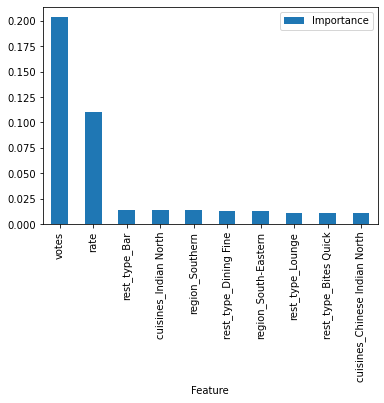

In [373]:
dt_en_features.sort_values(by="Importance",ascending=False)[:10].plot(kind="bar")

### 3.5 Decision Tree GridSearchCV

In [374]:
from sklearn.model_selection import GridSearchCV

In [375]:
params=[{'criterion':["entropy","gini"],
        'max_depth':[3,5,6,7,9]}]

In [376]:
dt=DecisionTreeClassifier()

dt_cv=GridSearchCV(estimator=dt,param_grid=params,scoring="accuracy",cv=5)
dt_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 5, 6, 7, 9]}],
             scoring='accuracy')

In [377]:
dt_cv.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [378]:
tree_grid_model=dt_cv.fit(X_train,y_train)
tree_grid_model.best_params_

{'criterion': 'gini', 'max_depth': 9}

In [379]:
dt_tuned=DecisionTreeClassifier(criterion="gini",max_depth=9)
dt_tuned.fit(X_train,y_train)
ypred_dt_tuned=dt_tuned.predict(X_test)

In [380]:
update_performance(name="Decision Tree tuned",model=dt_tuned,test=y_test,pred=ypred_dt_tuned)
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986
2,DT-base,0.934052,0.949870,0.948221,0.949045
3,DT_en-base,0.930585,0.948421,0.944452,0.946432
4,Decision Tree tuned,0.714005,0.922631,0.716552,0.806638


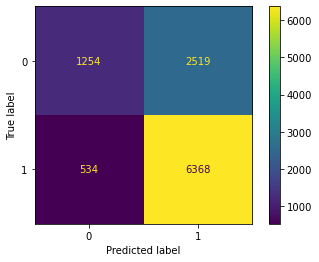

In [381]:
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_dt_tuned)).plot()
plt.show()

### 3.6 Gaussian NB

In [382]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
ypred_gnb=gnb.predict(X_test)

In [383]:
update_performance(name="GaussianNB-base",model=gnb,test=y_test,pred=ypred_gnb)
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986
2,DT-base,0.934052,0.949870,0.948221,0.949045
3,DT_en-base,0.930585,0.948421,0.944452,0.946432
4,Decision Tree tuned,0.714005,0.922631,0.716552,0.806638
5,GaussianNB-base,0.528337,0.277311,0.976033,0.431908


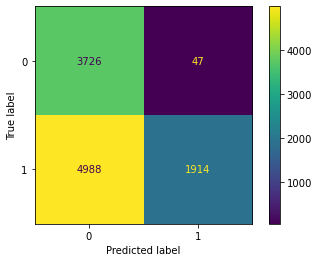

In [384]:
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_gnb)).plot()
plt.show()

### 3.7 Multinomial NB

In [385]:
X_train

,book_table,rate,votes,rest_type_Bakery Beverage Shop,rest_type_Bakery Bites Quick,rest_type_Bakery Cafe,rest_type_Bakery Court Food,rest_type_Bakery Dessert Parlor,rest_type_Bakery Kiosk,rest_type_Bar,...,cuisines_Tibetan,cuisines_Turkish,cuisines_Vietnamese,region_Eastern,region_North-Eastern,region_North-Western,region_Northern,region_South-Eastern,region_Southern,region_Western
8652,0,0.650,0.008555,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32029,0,0.700,0.009030,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
10562,0,0.725,0.026200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8992,0,0.675,0.001545,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1455,0,0.625,0.000535,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48400,0,0.625,0.000654,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34012,1,0.750,0.090245,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35365,0,0.500,0.000356,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48403,0,0.600,0.000594,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [386]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
ypred_mnb=mnb.predict(X_test)

In [387]:
update_performance(name="MultinomialNB-base",model=mnb,test=y_test,pred=ypred_mnb)
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986
2,DT-base,0.934052,0.949870,0.948221,0.949045
3,DT_en-base,0.930585,0.948421,0.944452,0.946432
4,Decision Tree tuned,0.714005,0.922631,0.716552,0.806638
5,GaussianNB-base,0.528337,0.277311,0.976033,0.431908
6,MultinomialNB-base,0.752693,0.933208,0.747216,0.829919


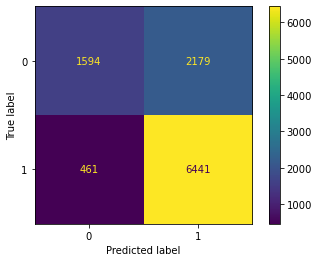

In [388]:
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_mnb)).plot()
plt.show()

### 3.8 Random Forest

In [389]:
rf=RandomForestClassifier(random_state=10)
rf.fit(X_train,y_train)
ypred_rf=rf.predict(X_test)

In [390]:
update_performance(name="Random Forest-base",model=rf,test=y_test,pred=ypred_rf)
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986
2,DT-base,0.934052,0.949870,0.948221,0.949045
3,DT_en-base,0.930585,0.948421,0.944452,0.946432
4,Decision Tree tuned,0.714005,0.922631,0.716552,0.806638
5,GaussianNB-base,0.528337,0.277311,0.976033,0.431908
6,MultinomialNB-base,0.752693,0.933208,0.747216,0.829919
7,Random Forest-base,0.943419,0.968125,0.945655,0.956758


In [391]:
rf_features=pd.DataFrame({"Feature":X_train.columns,
                 'Importance':rf.feature_importances_})
rf_features.sort_values(by="Importance",ascending=False)

,Feature,Importance
2,votes,0.240933
1,rate,0.134746
1798,region_South-Eastern,0.014449
1794,region_Eastern,0.013505
1799,region_Southern,0.013119
...,...,...
689,cuisines_Beverages Cafe Continental Desserts Tea,0.000000
963,cuisines_Biryani Kebab Kerala,0.000000
1271,cuisines_Chinese Finger Food,0.000000
1412,cuisines_Continental Desserts Indian Indian It...,0.000000


<AxesSubplot:xlabel='Feature'>

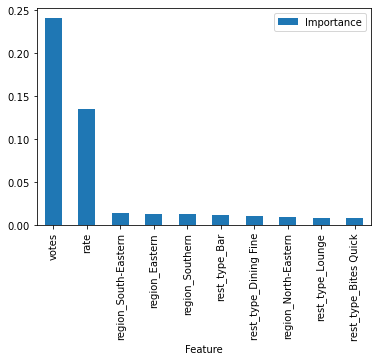

In [392]:
rf_features.set_index('Feature',inplace=True)
rf_features.sort_values(by="Importance",ascending=False)[:10].plot(kind="bar")

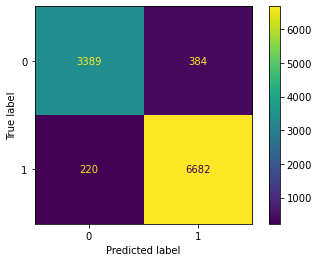

In [393]:
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_rf)).plot()
plt.show()

### 3.9 Random Forest with Entropy

In [394]:
rf_en=RandomForestClassifier(random_state=10,criterion="entropy")
rf_en.fit(X_train,y_train)
ypred_rf_en=rf.predict(X_test)

In [395]:
update_performance(name="Random Forest en-base",model=rf_en,test=y_test,pred=ypred_rf_en)
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986
2,DT-base,0.934052,0.949870,0.948221,0.949045
3,DT_en-base,0.930585,0.948421,0.944452,0.946432
4,Decision Tree tuned,0.714005,0.922631,0.716552,0.806638
5,GaussianNB-base,0.528337,0.277311,0.976033,0.431908
6,MultinomialNB-base,0.752693,0.933208,0.747216,0.829919
7,Random Forest-base,0.943419,0.968125,0.945655,0.956758
8,Random Forest en-base,0.943419,0.968125,0.945655,0.956758


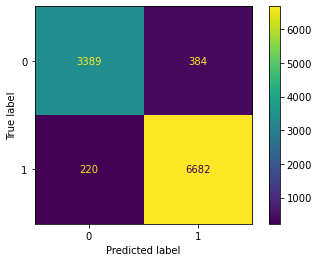

In [396]:
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_rf_en)).plot()
plt.show()

<AxesSubplot:xlabel='Feature'>

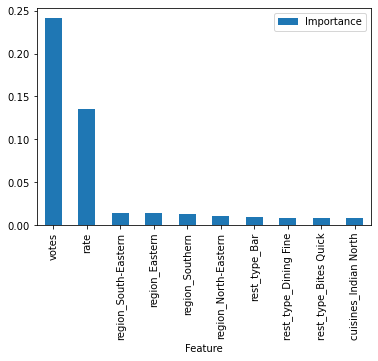

In [397]:
rf_en_features=pd.DataFrame({"Feature":X_train.columns,
                 'Importance':rf_en.feature_importances_})
rf_en_features.set_index('Feature',inplace=True)
rf_en_features.sort_values(by="Importance",ascending=False)[:10].plot(kind="bar")

### 3.10 Bagging Classifier

In [398]:
dt=DecisionTreeClassifier(random_state=10)
bc_dt=BaggingClassifier(estimator=dt,random_state=10)
bc_dt.fit(X_train,y_train)
ypred_bc_dt=bc_dt.predict(X_test)

In [399]:
update_performance(name="Bagging DT-base",model=bc_dt,test=y_test,pred=ypred_bc_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986
2,DT-base,0.934052,0.949870,0.948221,0.949045
3,DT_en-base,0.930585,0.948421,0.944452,0.946432
4,Decision Tree tuned,0.714005,0.922631,0.716552,0.806638
5,GaussianNB-base,0.528337,0.277311,0.976033,0.431908
6,MultinomialNB-base,0.752693,0.933208,0.747216,0.829919
7,Random Forest-base,0.943419,0.968125,0.945655,0.956758
8,Random Forest en-base,0.943419,0.968125,0.945655,0.956758
9,Bagging DT-base,0.936206,0.953057,0.948522,0.950784


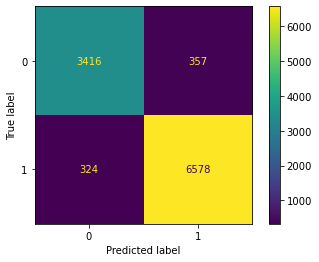

In [400]:
ConfusionMatrixDisplay(confusion_matrix(y_test,ypred_bc_dt)).plot()
plt.show()

### 3.11 AdaBoost

In [401]:
ada_dt=AdaBoostClassifier(dt,random_state=10)
ada_dt.fit(X_train,y_train)
ypred_ada_dt=ada_dt.predict(X_test)

In [402]:
update_performance(name="AdaBoost DT-base",model=ada_dt,test=y_test,pred=ypred_ada_dt)
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986
2,DT-base,0.934052,0.949870,0.948221,0.949045
3,DT_en-base,0.930585,0.948421,0.944452,0.946432
4,Decision Tree tuned,0.714005,0.922631,0.716552,0.806638
5,GaussianNB-base,0.528337,0.277311,0.976033,0.431908
6,MultinomialNB-base,0.752693,0.933208,0.747216,0.829919
7,Random Forest-base,0.943419,0.968125,0.945655,0.956758
8,Random Forest en-base,0.943419,0.968125,0.945655,0.956758
9,Bagging DT-base,0.936206,0.953057,0.948522,0.950784


### 3.12 XGBoost

In [403]:
xg=XGBClassifier()
xg.fit(X_train,y_train)
ypred_xg=xg.predict(X_test)

In [404]:
update_performance(name="XGBoost-base",model=xg,test=y_test,pred=ypred_xg)
perf_score

,Model,Accuracy,Recall,Precision,F1-score
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
1,KNN-base,0.849555,0.904086,0.868597,0.885986
2,DT-base,0.934052,0.949870,0.948221,0.949045
3,DT_en-base,0.930585,0.948421,0.944452,0.946432
4,Decision Tree tuned,0.714005,0.922631,0.716552,0.806638
5,GaussianNB-base,0.528337,0.277311,0.976033,0.431908
6,MultinomialNB-base,0.752693,0.933208,0.747216,0.829919
7,Random Forest-base,0.943419,0.968125,0.945655,0.956758
8,Random Forest en-base,0.943419,0.968125,0.945655,0.956758
9,Bagging DT-base,0.936206,0.953057,0.948522,0.950784


In [405]:
perf_score.sort_values(by="F1-score",ascending=False)

,Model,Accuracy,Recall,Precision,F1-score
7,Random Forest-base,0.943419,0.968125,0.945655,0.956758
8,Random Forest en-base,0.943419,0.968125,0.945655,0.956758
10,AdaBoost DT-base,0.937611,0.970733,0.935232,0.952652
9,Bagging DT-base,0.936206,0.953057,0.948522,0.950784
2,DT-base,0.934052,0.949870,0.948221,0.949045
3,DT_en-base,0.930585,0.948421,0.944452,0.946432
1,KNN-base,0.849555,0.904086,0.868597,0.885986
11,XGBoost-base,0.776300,0.921327,0.775110,0.841917
0,LogisticReg-base,0.755878,0.930165,0.751404,0.831283
6,MultinomialNB-base,0.752693,0.933208,0.747216,0.829919


* Random forest is showing the highest F1-score, as well Accuracy, as well as Precision.

<AxesSubplot:xlabel='Feature'>

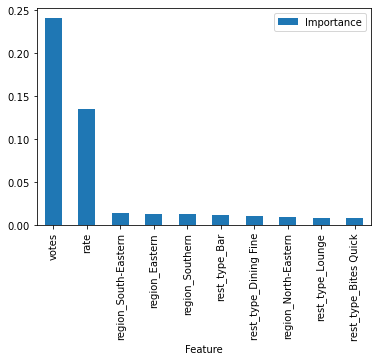

In [407]:
rf_features.sort_values(by="Importance",ascending=False)[:10].plot(kind="bar")

* By RandomForest the top 10 features with the highest importance are :
1. Votes
2. Rate
3. Region South Eastern
4. Region Eastern
5. Region Southern
6. Restuarant type Bar
7. Restuarant type Fine Dining
8. Region North Eastern
9. Restuarant type Lounge
10. Restuarant Type Quick Bites

* These are the factors that contribute the most in order to determine whether a restuarant provides online order provision or not
* The restuarants in the South Eastern, Eastern, Southern and North Eastern region are more inclined to provide online orders
* The votes, rating, and restuarant type of Bar, Fine Dining, lounge and quick bites are more inclined to provide online orders